In [1]:
import os
from urllib.request import urlretrieve
import gzip
import matplotlib.pyplot as plt
import numpy as np
from pyteomics import fasta, parser, mass, achrom, electrochem, auxiliary

import pybenford as ben

In [2]:
%%time
print('Cleaving the proteins with trypsin...')
unique_peptides = set()
with gzip.open('human.fasta.gz', mode='rt') as gzfile:
    for description, sequence in fasta.FASTA(gzfile):
        new_peptides = parser.cleave(sequence, 'trypsin', missed_cleavages=1)
        unique_peptides.update(new_peptides)
print('Done, {0} sequences obtained!'.format(len(unique_peptides)))

Cleaving the proteins with trypsin...
Done, 1693078 sequences obtained!
CPU times: user 3.28 s, sys: 88.2 ms, total: 3.36 s
Wall time: 3.38 s


In [3]:
peptides_human = [{'sequence': i} for i in unique_peptides]

In [4]:
%%time
print('Parsing peptide sequences...')
for peptide in peptides_human:
    peptide['parsed_sequence'] = parser.parse(
         peptide['sequence'],
        show_unmodified_termini=True)
    peptide['length'] = parser.length(peptide['parsed_sequence'])
print('Done!')

Parsing peptide sequences...
Done!
CPU times: user 30.7 s, sys: 192 ms, total: 30.9 s
Wall time: 30.9 s


In [5]:
len_pept_human = []
for peptide in peptides_human:
    len_pept_human.append(peptide["length"])

In [6]:
print(min(len_pept_human))
print(max(len_pept_human))
print(np.mean(len_pept_human))

1
2433
18.144791320896026


### Premier digit

In [44]:
first_digit_human = ben.count_first_digit(len_pept_human)
freq_obs_human = ben.normalize_first_digit(first_digit_human)
print(first_digit_human)
print(freq_obs_human)

[636513 290734 137409  76645 109901 123476 116300 104421  97679]
[0.37595019 0.1717192  0.08115929 0.04526962 0.06491195 0.07292989
 0.06869146 0.06167524 0.05769315]


In [8]:
%%time
print('Cleaving the proteins with trypsin...')
unique_peptides = set()
with gzip.open('yeast.fasta.gz', mode='rt') as gzfile:
    for description, sequence in fasta.FASTA(gzfile):
        new_peptides = parser.cleave(sequence, 'trypsin', missed_cleavages=1)
        unique_peptides.update(new_peptides)
print('Done, {0} sequences obtained!'.format(len(unique_peptides)))

Cleaving the proteins with trypsin...
Done, 471215 sequences obtained!
CPU times: user 924 ms, sys: 24 ms, total: 948 ms
Wall time: 946 ms


In [9]:
peptides_yeast = [{'sequence': i} for i in unique_peptides]

In [10]:
%%time
print('Parsing peptide sequences...')
for peptide in peptides_yeast:
    peptide['parsed_sequence'] = parser.parse(
         peptide['sequence'],
        show_unmodified_termini=True)
    peptide['length'] = parser.length(peptide['parsed_sequence'])
print('Done!')

Parsing peptide sequences...
Done!
CPU times: user 8.52 s, sys: 55.9 ms, total: 8.58 s
Wall time: 8.57 s


In [11]:
len_pept_yeast = []
for peptide in peptides_yeast:
    len_pept_yeast.append(peptide["length"])

In [12]:
print(min(len_pept_yeast))
print(max(len_pept_yeast))
print(np.mean(len_pept_yeast))

1
796
16.625020425920226


### Premier digit

In [45]:
first_digit_yeast = ben.count_first_digit(len_pept_yeast)
freq_obs_yeast = ben.normalize_first_digit(first_digit_yeast)
print(first_digit_yeast)
print(freq_obs_yeast)

[173760  77827  34486  24848  35939  35163  32735  29614  26843]
[0.36874887 0.1651624  0.07318528 0.05273177 0.07626879 0.07462199
 0.06946935 0.06284605 0.0569655 ]


In [46]:
freq_theo = ben.get_theoretical_freq_benford()

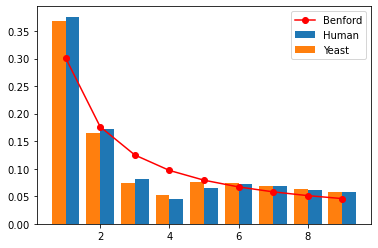

In [47]:
plt.plot(range(1, len(freq_theo)+1), freq_theo, marker="o",
             color="red")
plt.bar(range(1, len(freq_obs_human)+1), freq_obs_human,
        align='edge', width=0.4)
plt.bar(range(1, len(freq_obs_yeast)+1), freq_obs_yeast,
        align='edge', width=-0.4)
plt.legend(("Benford", "Human", "Yeast"));

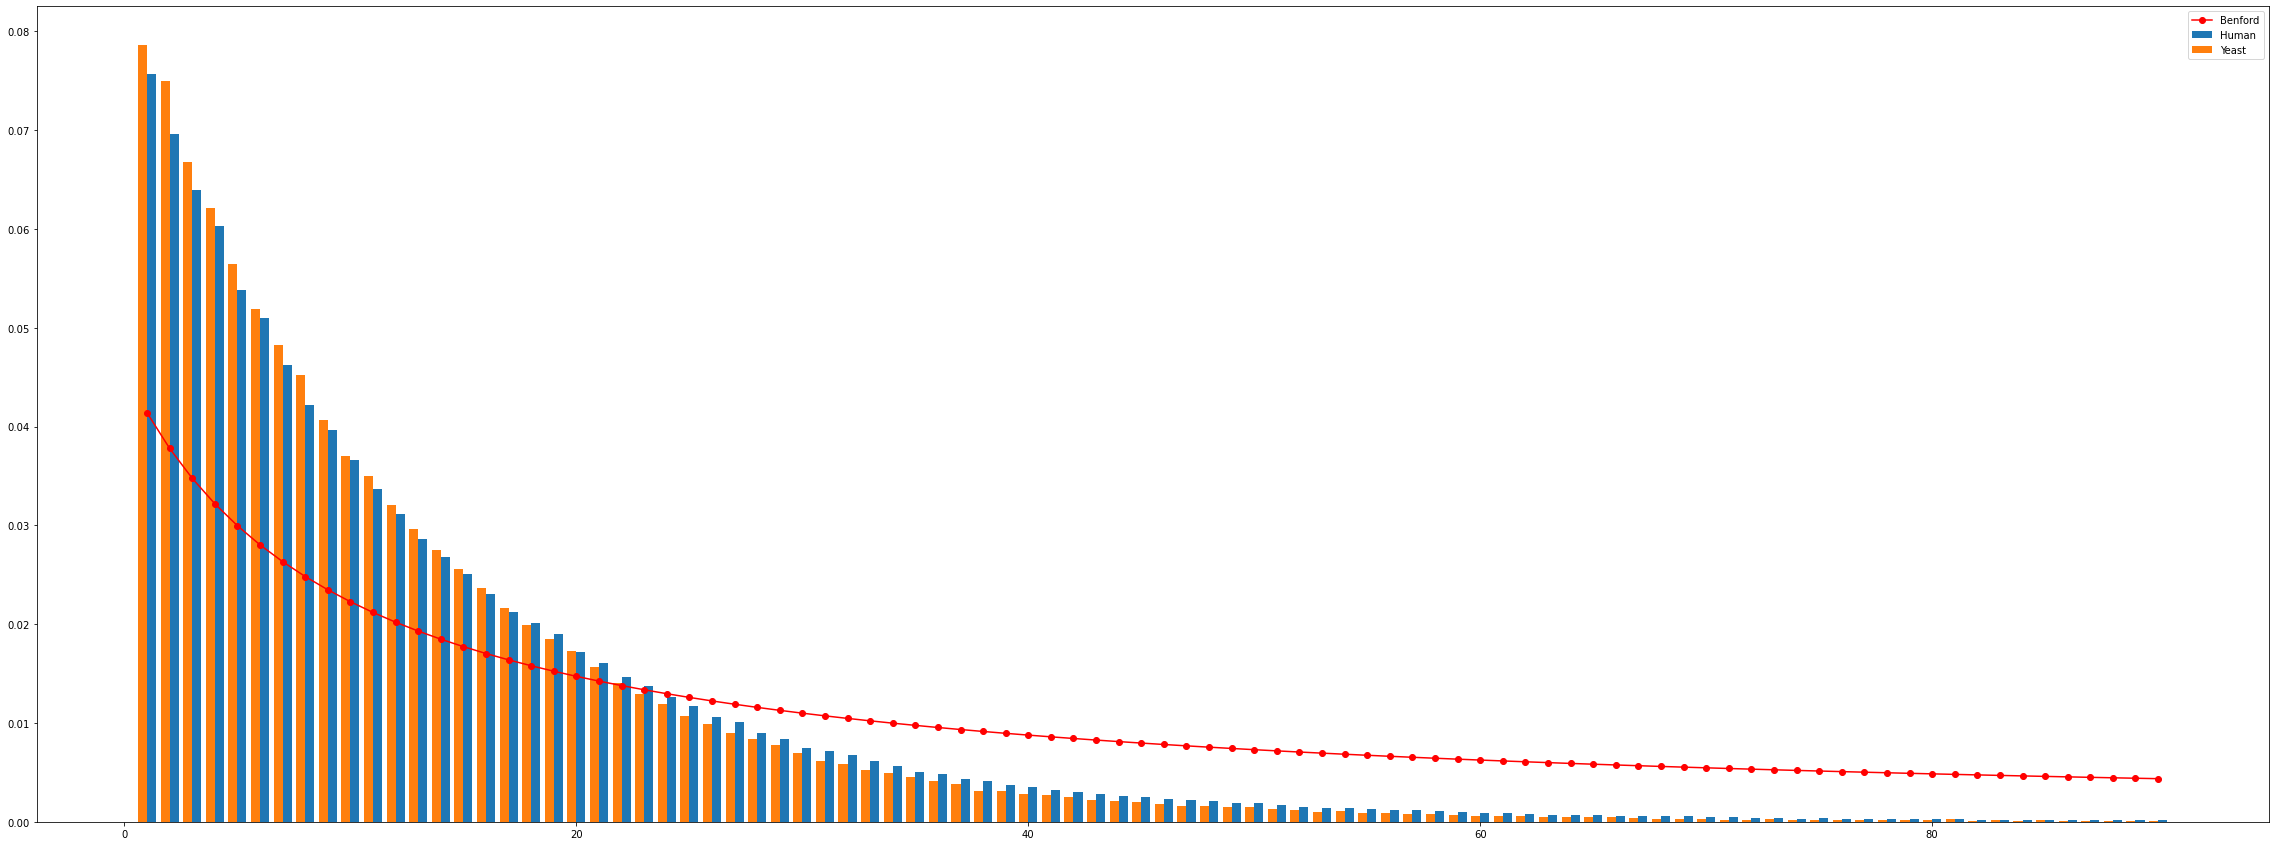

In [43]:
plt.figure(figsize=(40, 15))
plt.plot(range(1, len(freq_theo)+1), freq_theo, marker="o",
             color="red")
plt.bar(range(1, len(freq_obs_human)+1), freq_obs_human,
        align='edge', width=0.4)
plt.bar(range(1, len(freq_obs_yeast)+1), freq_obs_yeast,
        align='edge', width=-0.4)
plt.legend(("Benford", "Human", "Yeast"));